# Collinearity
### For INM702 - regression

When discussing the regression model, we will use notation from "Applied Regression Analysis", Springer. (XXXX - need to check I use correct citation)

The linear model can be written as

$$\boldsymbol{Y} = \boldsymbol{X\beta} + \boldsymbol{\epsilon}$$

Where 
* $\boldsymbol{Y}$ has size $(N, 1)$, where $N$ is the sample size,
* $\boldsymbol{X}$ is of size $(n, p')$ and has a column of 1s as the first column. There are $p = p'-1$ independent random variables, each sampled $N$ times. 
* $\boldsymbol{\beta}$ is of size $(p', 1)$ and consists of $\beta_0$, the intercept, and $(\beta_1,... ,\beta_p)$, the coefficients corresponding to the random variables.
* $\boldsymbol{\epsilon}$ is the random noise and consists of independent identically distributed normal variables with mean 0. 

$\hat{\boldsymbol{\beta}}$, the estimate of $\boldsymbol{\beta}$ is a random vector and can be written as a linear combination of the observed random dependent variable $\boldsymbol{Y}$

$\hat{\boldsymbol{\beta}} = (\boldsymbol{X}^{\prime}\boldsymbol{X})^{-1}(\boldsymbol{X}^{\prime}\boldsymbol{Y})$

$(\boldsymbol{X}^{\prime}\boldsymbol{X})$ has an inverse if $\boldsymbol{X}$ is of full rank - i.e. has no colinearities. If $\boldsymbol{X}$ has colinearities, then it will be hard to make good estimates of $\boldsymbol{\beta}$.

We investigate the implications of colinearities in the features, and what we can do to mitigate them. 

In [1]:
import sys
sys.path.insert(0, '../src')

from colinearity import ColinearX
import numpy as np
import matplotlib.pyplot as plt 
# from sklearn.linear_model import LinearRegression
import scipy.stats as sps
import seaborn as sns
sns.set(style='ticks')

## This is first draft and I don't think I'll keep any of it

First run a regression for $\boldsymbol{X}$ consisting of 4 independent random variables, with two being uniform $[0,1]$ and two being normal with means 0.5 and -1 and variance 1. $\boldsymbol{\beta}=(1,4,1,1,1)$

R^2 = 0.855


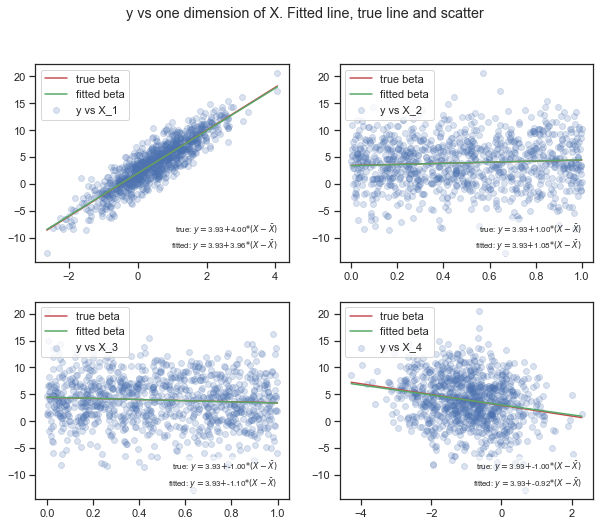

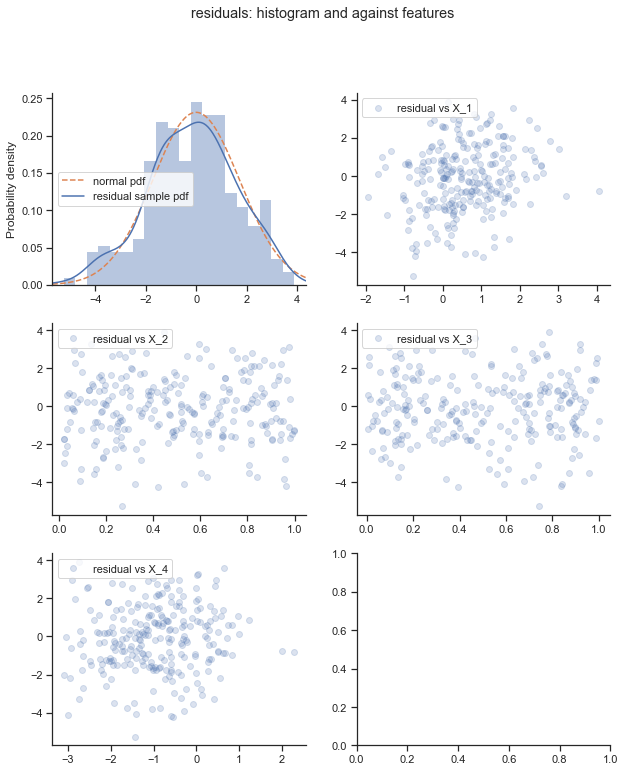

In [2]:
reg = ColinearX(N=1000, beta=(1,4,1,-1,-1), noise_var=3)
reg.generate_X(co_type='pairwise correlation',mean=(0.5,0,0,-1),
   cov=0)
reg.to_uniform(i_list=[2,3])
reg.generate_y()
reg.train_test_split()
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

Now modify the data parameters slightly so that X_0 and X_1 have coveriance of 0.8

R^2 = 0.853


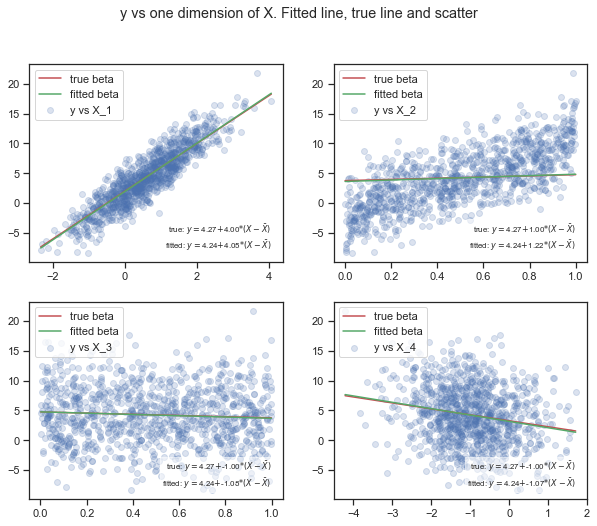

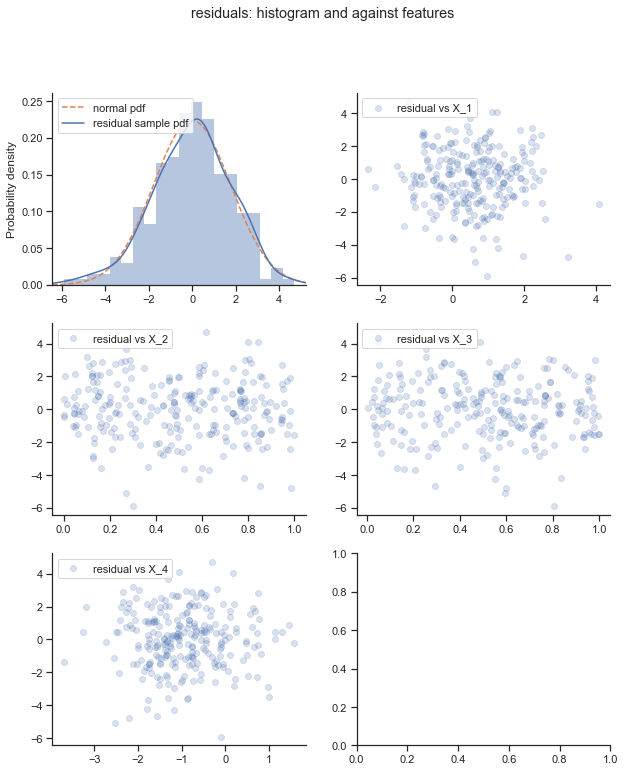

In [3]:
reg = ColinearX(N=1000, beta=(1,4,1,-1,-1), noise_var=3)
reg.generate_X(co_type='pairwise correlation',mean=(0.5,0,0,-1),
   cov=0.8)
reg.to_uniform(i_list=[2,3])
reg.generate_y()
reg.train_test_split()
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

$X_2$ looks like a poor fit and it also looks suspiciously like $X_1$. Let's try removing $X_2$ and seeing how the model does:

R^2 = 0.853


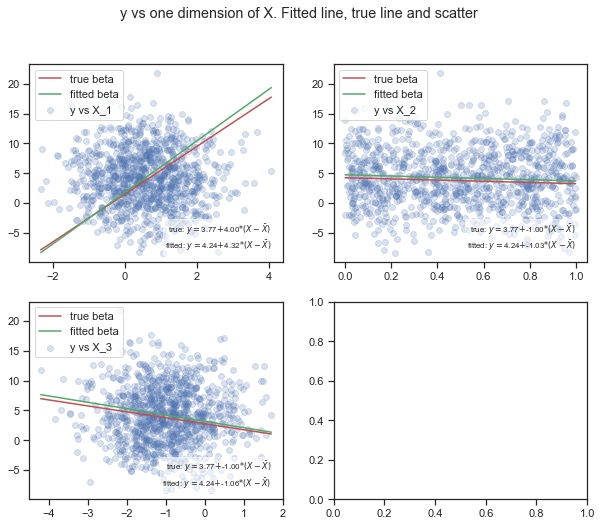

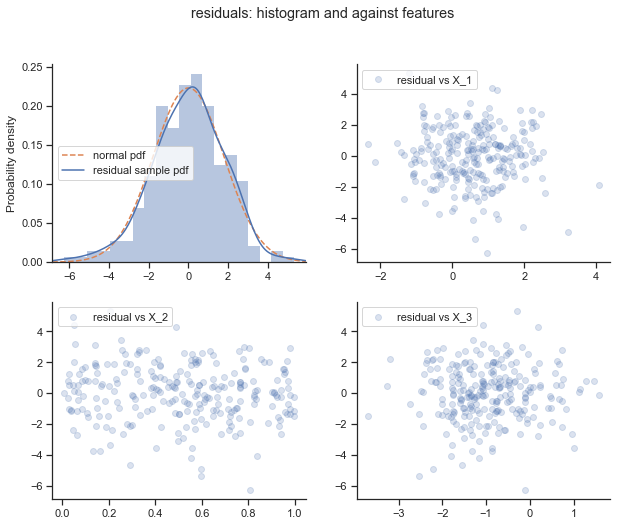

In [4]:
reg.remove_Xi(2)
reg.fit()
print('R^2 = {:.3f}'.format(reg.score))
reg.plot2D()
reg.plot_residuals()

Well we didn't need $X_1$ but the overal fit of the model hasn't changed.